In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss
import seaborn as sns
from scipy.io import loadmat
from reliability.Distributions import Normal_Distribution, Weibull_Distribution, Lognormal_Distribution
from reliability.Probability_plotting import Normal_probability_plot, Weibull_probability_plot, Lognormal_probability_plot 
drive.mount('/content/gdrive', force_remount= True)

Mounted at /content/gdrive


In [12]:
!pip install reliability

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
THT = pd.read_excel('gdrive/MyDrive/Colab Notebooks/Data_Data4SixSigma/_fb205379f16688a0d5fff594e91ac7e7_data_files_DA-LSS.xlsx',
                    sheet_name = "THT", header = 8, usecols = "A:B")

paramsN = ss.norm.fit(THT["THT "])



In [14]:
!python -m pip uninstall matplotlib
!pip install matplotlib==3.1.3

Found existing installation: matplotlib 3.5.3
Uninstalling matplotlib-3.5.3:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/matplotlib-3.5.3-py3.7-nspkg.pth
    /usr/local/lib/python3.7/dist-packages/matplotlib-3.5.3.dist-info/*
    /usr/local/lib/python3.7/dist-packages/matplotlib/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid1/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axisartist/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/tests/*
    /usr/local/lib/python3.7/dist-packages/pylab.py
Proceed (y/n)? y
  Successfully uninstalled matplotlib-3.5.3
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 13.1 MB 7.0 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are i

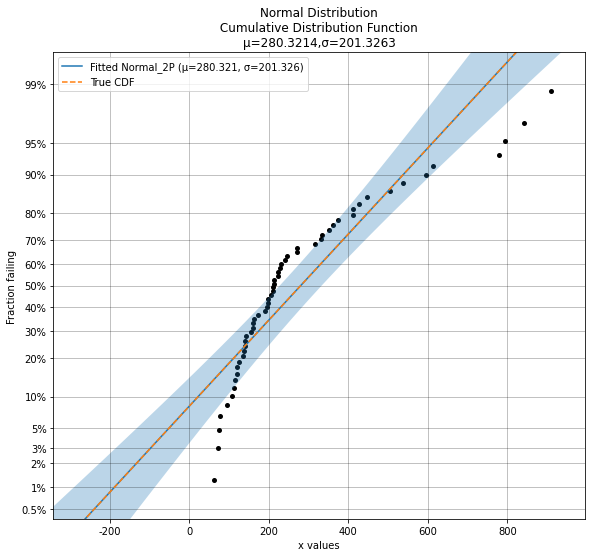

In [16]:
dist = Normal_Distribution(mu = paramsN[0], sigma = paramsN[1])
Normal_probability_plot(failures = THT["THT "].to_list()) #generates the probability plot
dist.CDF(linestyle='--',label='True CDF') #this is the actual distribution provided for comparison
plt.legend()
plt.show()

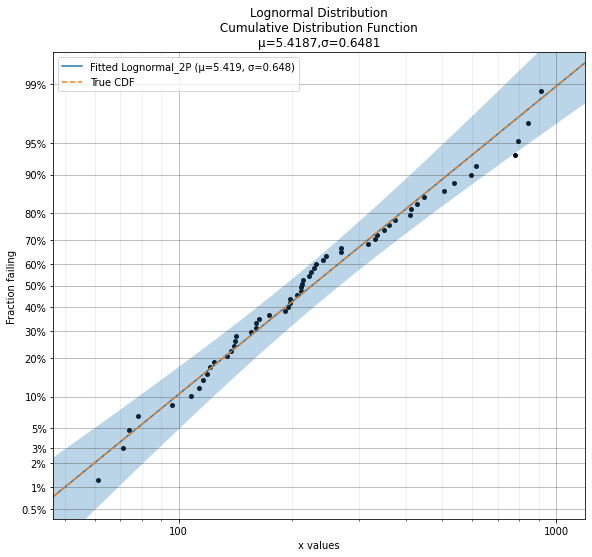

In [17]:
paramsL = ss.lognorm.fit(THT["THT "], floc = 0)
dist = Lognormal_Distribution(mu = np.log(paramsL[2]), sigma = paramsL[0])
Lognormal_probability_plot(failures = THT["THT "].to_list()) #generates the probability plot
dist.CDF(linestyle='--',label='True CDF') #this is the actual distribution provided for comparison
plt.legend()
plt.show()